In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from igraph import Graph, EdgeSeq
import igraph
import plotly.graph_objects as go

In [49]:
treeStr = '[ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ . [ . [ . [ . [ . [ . [ D ] [ E ] ] [ L ] ] [ E ] ] [ T ] ] [ E ] ] [ # ] ] [ . [ . [ . [ . [ I ] [ N ] ] [ T ] ] [ O ] ] [ # ] ] ] [ . [ . [ . [ . [ . [ . [ I ] [ N ] ] [ S ] ] [ E ] ] [ R ] ] [ T ] ] [ # ] ] ] [ . [ . [ > ] [ = ] ] [ # ] ] ] [ . [ > ] [ # ] ] ] [ . [ = ] [ # ] ] ] [ . [ . [ < ] [ = ] ] [ # ] ] ] [ . [ < ] [ # ] ] ] [ . [ ) ] [ # ] ] ] [ . [ ( ] [ # ] ] ] [ . [ . [ . [ . [ . [ . [ V ] [ A ] ] [ L ] ] [ U ] ] [ E ] ] [ S ] ] [ # ] ] ] [ . [ . ] [ # ] ] ] [ . [ ; ] [ # ] ] ] [ . [ . [ B ] [ Y ] ] [ # ] ] ] [ . [ . [ O ] [ R ] ] [ # ] ] ] [ . [ . [ . [ . [ . [ . [ S ] [ E ] ] [ L ] ] [ E ] ] [ C ] ] [ T ] ] [ # ] ] ] [ . [ . [ . [ . [ . [ W ] [ H ] ] [ E ] ] [ R ] ] [ E ] ] [ # ] ] ] [ . [ . [ . [ . [ . [ G ] [ R ] ] [ O ] ] [ U ] ] [ P ] ] [ # ] ] ] [ . [ . [ . [ . [ . [ O ] [ R ] ] [ D ] ] [ E ] ] [ R ] ] [ # ] ] ] [ . [ . [ . [ . [ . [ . [ H ] [ A ] ] [ V ] ] [ I ] ] [ N ] ] [ G ] ] [ # ] ] ] [ . [ . [ . [ A ] [ N ] ] [ D ] ] [ # ] ] ] [ . [ . [ . [ . [ F ] [ R ] ] [ O ] ] [ M ] ] [ # ] ] ] [ . [ , ] [ # ] ] ] [ . [ . [ . [ N ] [ O ] ] [ T ] ] [ # ] ] ] [ . [ + [ + [ \\n ] [ \\t ] ] [ \s ] ] [ # ] ] ] [ . [ . [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ a ] [ b ] ] [ c ] ] [ d ] ] [ e ] ] [ f ] ] [ g ] ] [ h ] ] [ i ] ] [ j ] ] [ k ] ] [ l ] ] [ m ] ] [ n ] ] [ o ] ] [ p ] ] [ q ] ] [ r ] ] [ s ] ] [ t ] ] [ u ] ] [ v ] ] [ w ] ] [ x ] ] [ y ] ] [ z ] ] [ * [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ + [ 1 ] [ 2 ] ] [ 3 ] ] [ 4 ] ] [ 5 ] ] [ 6 ] ] [ 7 ] ] [ 8 ] ] [ 9 ] ] [ 0 ] ] [ a ] ] [ b ] ] [ c ] ] [ d ] ] [ e ] ] [ f ] ] [ g ] ] [ h ] ] [ i ] ] [ j ] ] [ k ] ] [ l ] ] [ m ] ] [ n ] ] [ o ] ] [ p ] ] [ q ] ] [ r ] ] [ s ] ] [ t ] ] [ u ] ] [ v ] ] [ w ] ] [ x ] ] [ y ] ] [ z ] ] ] ] [ # ] ] ]'

# treeStr = '[ a [ a [ a [ a [ a ] [ a ] ] [ a [ a ] [ a ] ] ] [ a [ a [ a ] [ a ] ] [ a [ a ] [ a ] ] ] ] [ a [ a [ a [ a ] [ a ] ] [ a [ a ] [ a ] ] ] [ a [ a [ a ] [ a ] ] [ a [ a ] [ a [ a [ a [ a [ a ] [ a ] ] [ a [ a ] [ a ] ] ] [ a [ a [ a ] [ a ] ] [ a [ a ] [ a [ a [ a [ a [ a ] [ a ] ] [ a [ a ] [ a ] ] ] [ a [ a [ a ] [ a ] ] [ a [ a ] [ a ] ] ] ] [ a [ a [ a [ a ] [ a ] ] [ a [ a ] [ a ] ] ] [ a [ a [ a ] [ a ] ] [ a [ a ] [ a ] ] ] ] ] ] ] ] [ a [ a [ a [ a ] [ a ] ] [ a [ a ] [ a ] ] ] [ a [ a [ a ] [ a ] ] [ a [ a ] [ a [ a [ a [ a [ a ] [ a ] ] [ a [ a ] [ a ] ] ] [ a [ a [ a ] [ a ] ] [ a [ a ] [ a ] ] ] ] [ a [ a [ a [ a ] [ a ] ] [ a [ a ] [ a ] ] ] [ a [ a [ a ] [ a ] ] [ a [ a ] [ a ] ] ] ] ] ] ] ] ] ] ] ] ]'

In [47]:
def genHelper(tokens: list[str], numVertices, label, edgeList: list):
    curToken = tokens.pop()
    assert curToken == '['

    curNumber = numVertices[0]
    numVertices[0] += 1
    curName = tokens.pop()
    label[curNumber] = curName

    while tokens[-1] == '[':
        childNumber = genHelper(tokens, numVertices, label, edgeList)
        edgeList.append([curNumber, childNumber])

    curToken = tokens.pop()
    assert curToken == ']'

    return curNumber
    



def generateGraphFromPreorderTraversal(treeStr):
    numVertices = [0]
    label = {}
    edgeList = []

    tokens = treeStr.split(' ')
    tokens.reverse()
    # print('tokens -> ', tokens)

    rootNumber = genHelper(tokens, numVertices, label, edgeList)
    assert rootNumber == 0

    # print('numVertices -> ', numVertices[0])
    # print('label -> ', label)
    # print('edgeList -> ', edgeList)

    G = Graph()
    G.add_vertices(numVertices[0])
    for i in range(numVertices[0]):
        G.vs[i]["label"] = label[i]
        G.vs[i]["size"] = 8
        if label[i] == '#':
            G.vs[i]["color"] = 'purple'
        else:
            G.vs[i]["color"] = 'cyan'
    for edge in edgeList:
        G.add_edge(edge[0], edge[1])

    return G, numVertices[0], label

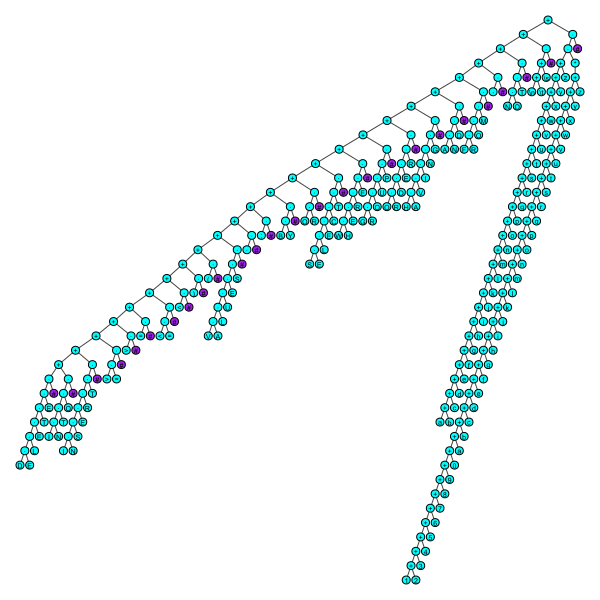

In [50]:
G, n, label = generateGraphFromPreorderTraversal(treeStr)
igraph.plot(G, layout = G.layout_reingold_tilford(mode = "in", root = [0]), vertex_label_size = 7)
# igraph.plot(G, layout = G.layout_reingold_tilford_circular(mode = "in", root = [0]))